In [2]:
import math
import pandas_datareader as web
import numpy as np
import pandas as pd
from sklearn.preprocessing import MinMaxScaler
from keras.models import Sequential
from keras.layers import Dense, LSTM
import matplotlib.pyplot as plt

plt.style.use('fivethirtyeight')

df = web.DataReader('AAPL', data_source='yahoo',
                    start='2012-01-01', end='2021-06-04')

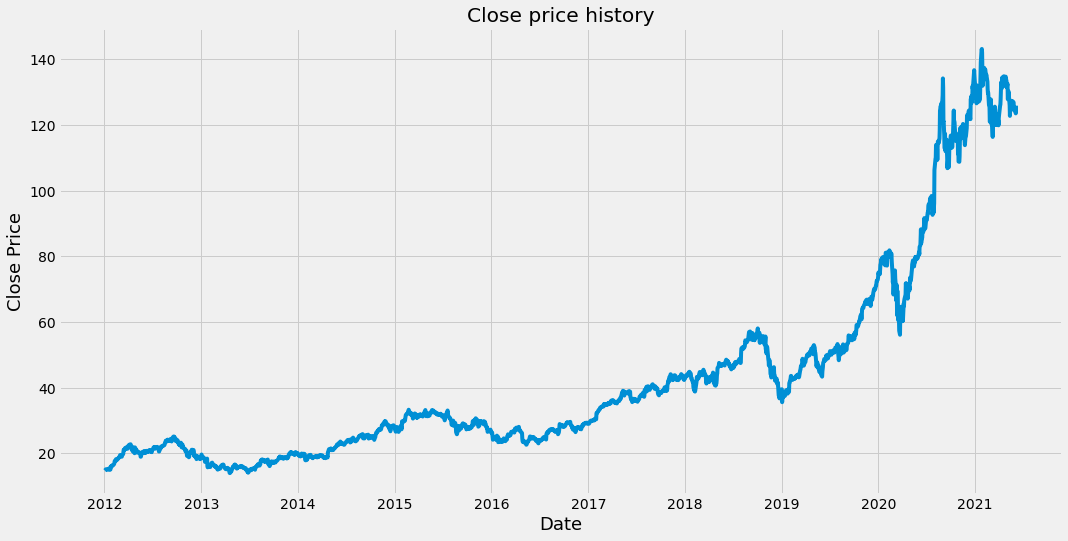

In [3]:
# show the table
# print(df)

# show the rows and columns
# print(df.shape)

plt.figure(figsize=(16, 8))
plt.title('Close price history')
plt.plot(df['Close'])
plt.xlabel('Date', fontsize=18)
plt.ylabel('Close Price', fontsize=18)
plt.show()

# create a new dataframe with only the 'close' column
data = df.filter(['Close'])

# convert the dataframe into a numpy array
dataset = data.values

In [4]:
# compute number of rows to train the modelon
training_data_len = math.ceil(len(dataset) * .8)

# normalization of data to be values between 0 and 1
scaler = MinMaxScaler(feature_range=(0, 1))
scaled_data = scaler.fit_transform(dataset)

# create the training dataset
train_data = scaled_data[0:training_data_len, :]

# split into x_train and y_train data sets
x_train = []
y_train = []
for i in range(60, len(train_data)):
    x_train.append(train_data[i-60:i, 0])
    y_train.append(train_data[i, 0])

In [5]:
# convert x and y train into numpy arrays
x_train, y_train = np.array(x_train), np.array(y_train)

# reshape the data into the shape accepted by the LTSM
x_train = np.reshape(x_train,(x_train.shape[0], x_train.shape[1], 1))


# Build the LTSM network model
model = Sequential()
model.add(LSTM(units=50, return_sequences=True,input_shape=(x_train.shape[1],1)))
model.add(LSTM(units=50, return_sequences=False))
model.add(Dense(units=25))
model.add(Dense(units=1))

#compile the model
model.compile(optimizer='adam', loss='mean_squared_error')

#train the model
model.fit(x_train, y_train, batch_size=1, epochs=1)


1837/1837 [==============================] - 81s 40ms/step - loss: 6.9297e-04


In [6]:
#test dataset
test_data = scaled_data[training_data_len - 60: , : ]

#create the x_test and y_test datasets
x_test=[]
y_test =  dataset[training_data_len : , : ] 
#Get all of the rows from index 1603 to the rest and all of the columns (in this case it's only column 'Close'), so 2003 - 1603 = 400 rows of data
for i in range(60,len(test_data)):
    x_test.append(test_data[i-60:i,0])

In [7]:
#Convert x_test to a numpy array 
x_test = np.array(x_test)

#Reshape the data into the shape accepted by the LSTM
x_test = np.reshape(x_test, (x_test.shape[0],x_test.shape[1],1))

#Getting the models predicted price values
predictions = model.predict(x_test) 
predictions = scaler.inverse_transform(predictions)#Undo scaling

#calculate how accurate the model is by getting the RMSE
rmse=np.sqrt(np.mean(((predictions- y_test)**2)))
# print(rmse)

#Plot/Create the data for the graph
train = data[:training_data_len]
valid = data[training_data_len:]
valid['Predictions'] = predictions

<ipython-input-7-120ebff10f2f>:18: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  valid['Predictions'] = predictions


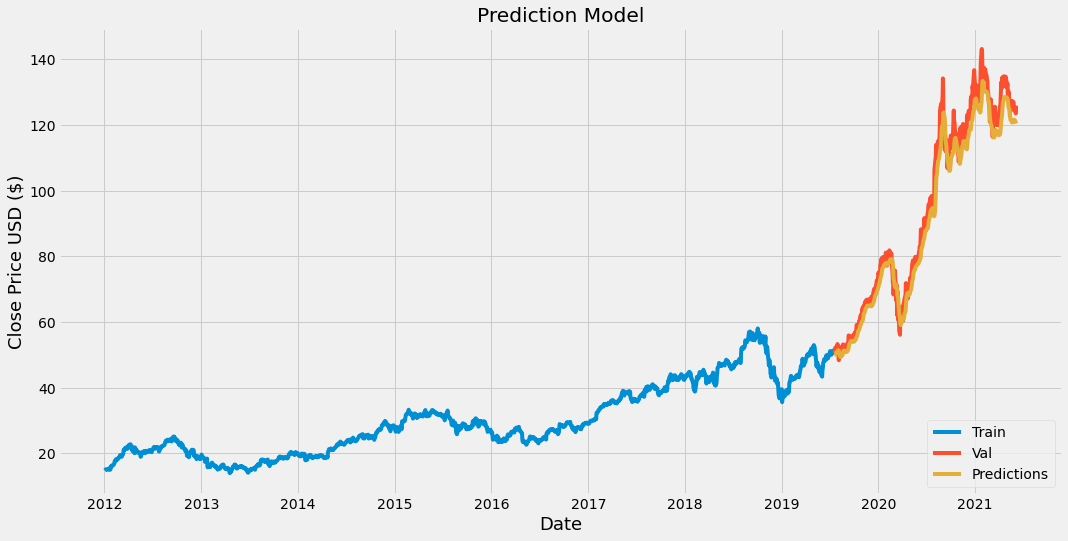

In [8]:
plt.figure(figsize=(16,8))
plt.title('Prediction Model')
plt.xlabel('Date', fontsize=18)
plt.ylabel('Close Price USD ($)', fontsize=18)
plt.plot(train['Close'])
plt.plot(valid[['Close', 'Predictions']])
plt.legend(['Train', 'Val', 'Predictions'], loc='lower right')
plt.show()

In [9]:
print(valid)

                 Close  Predictions
Date                               
2019-07-19   50.647499    50.054386
2019-07-22   51.805000    50.062088
2019-07-23   52.209999    50.175091
2019-07-24   52.167500    50.374039
2019-07-25   51.755001    50.584084
...                ...          ...
2021-05-28  124.610001   121.581535
2021-06-01  124.279999   121.347992
2021-06-02  125.059998   121.014488
2021-06-03  123.540001   120.788460
2021-06-04  125.889999   120.420746

[474 rows x 2 columns]


In [10]:
valid

,Close,Predictions
Date,,
2019-07-19,50.647499,50.054386
2019-07-22,51.805000,50.062088
2019-07-23,52.209999,50.175091
2019-07-24,52.167500,50.374039
2019-07-25,51.755001,50.584084
...,...,...
2021-05-28,124.610001,121.581535
2021-06-01,124.279999,121.347992
2021-06-02,125.059998,121.014488


In [ ]:
#test dataset
test_data = scaled_data[training_data_len - 60: , : ]

#create the x_test and y_test datasets
x_test=[]
y_test =  dataset[training_data_len : , : ] 
#Get all of the rows from index 1603 to the rest and all of the columns (in this case it's only column 'Close'), so 2003 - 1603 = 400 rows of data
for i in range(60,len(test_data)):
    x_test.append(test_data[i-60:i,0])

#Convert x_test to a numpy array 
x_test = np.array(x_test)

#Reshape the data into the shape accepted by the LSTM
x_test = np.reshape(x_test, (x_test.shape[0],x_test.shape[1],1))

#Getting the models predicted price values
predictions = model.predict(x_test) 
predictions = scaler.inverse_transform(predictions)#Undo scaling

#calculate how accurate the model is by getting the RMSE
rmse=np.sqrt(np.mean(((predictions- y_test)**2)))
# print(rmse)

#Plot/Create the data for the graph
train = data[:training_data_len]
valid = data[training_data_len:]
valid['Predictions'] = predictions
#Visualize the data
plt.figure(figsize=(16,8))
plt.title('Prediction Model')
plt.xlabel('Date', fontsize=18)
plt.ylabel('Close Price USD ($)', fontsize=18)
plt.plot(train['Close'])
plt.plot(valid[['Close', 'Predictions']])
plt.legend(['Train', 'Val', 'Predictions'], loc='lower right')
plt.show()

print(valid)